## Data Analysis

### Importing depencices

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Reading data

In [2]:
store = pd.read_csv('Data/store.csv')
train_1 = pd.read_csv('Data/train_1.csv')
train_2 = pd.read_csv('Data/train_2.csv')
train = pd.concat([train_1, train_2], axis=0)
train= train.drop(columns=['Unnamed: 0'])
test = pd.read_csv('Data/test.csv')

print('store : ',store.shape)
print('train : ',train.shape)
print('test : ',test.shape)

/home/ghiye/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


store :  (1115, 10)
train :  (1017209, 9)
test :  (41088, 8)


### Data Description

In [3]:
def missing_data(df) : 
    #caculate the total number of Null values for each variable
    total = df.isnull().sum()
    #caculate the percent of missing values
    percent_1 = df.isnull().sum()/df.shape[0]*100
    percent_2 = (round(percent_1, 1))
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    return missing_data.sort_values(by="%",ascending=False)

### Store

In [4]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
missing_data(store)

,Total,%
Promo2SinceWeek,544,48.8
Promo2SinceYear,544,48.8
PromoInterval,544,48.8
CompetitionOpenSinceMonth,354,31.7
CompetitionOpenSinceYear,354,31.7
CompetitionDistance,3,0.3
Store,0,0.0
StoreType,0,0.0
Assortment,0,0.0
Promo2,0,0.0


As we can see above, the missing values of the first 5 features are imortant ($\approx 50\%$), thus they might not be useful in our case, and probably we will drop them.

In [7]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

Mostly, all of the features are categorical. we can use for example `pd.get_dummies` to get the OneHot encoding of these features and to eliminate orders between features.

### Train

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [8]:
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 508604
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [10]:
missing_data(train)

,Total,%
Store,0,0.0
DayOfWeek,0,0.0
Date,0,0.0
Sales,0,0.0
Customers,0,0.0
Open,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0


There is no missing values in `train.csv`, thus all features can be used for prediction.

In [11]:
train.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

## Data Exploration

#### Day of the week

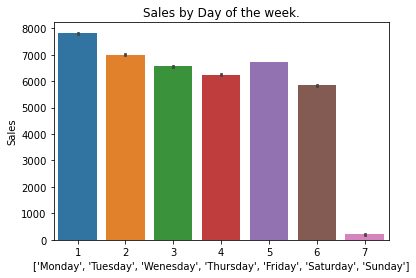

In [12]:
plt.figure()
plt.title('Sales by Day of the week.')
labels = ['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x='DayOfWeek', y='Sales', data=train)
ax.set_xlabel(labels)
plt.show()

We can see that sales drop on Sundays. However, we need to find if the stores are normally closed or opened during this day.

In [13]:
train.iloc[np.where(train['DayOfWeek']==7)]['Open'].value_counts()

0    141137
1      3593
Name: Open, dtype: int64

We can see that most of the sundays, the store is closed. This is why the sales drop during this day.

#### Open/Closed days

In [14]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("0 sales during closed days: " + str(not_open.size == 0))

0 sales during closed days: True


In [15]:
train.groupby('Open')['Sales'].mean()

Open
0       0.000000
1    6955.514291
Name: Sales, dtype: float64

We can eliminate the days when the stores where closed to not affect our prediction.

#### Customers

We will show the number of customers per day.

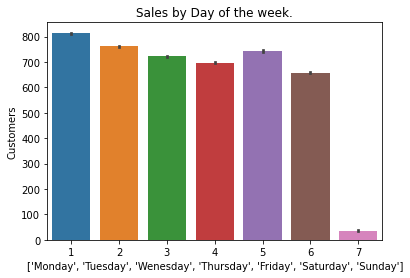

In [16]:
plt.figure()
plt.title('Sales by Day of the week.')
labels = ['Monday', 'Tuesday', 'Wenesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x='DayOfWeek', y='Customers', data=train)
ax.set_xlabel(labels)
plt.show()

#### Customers & Sales

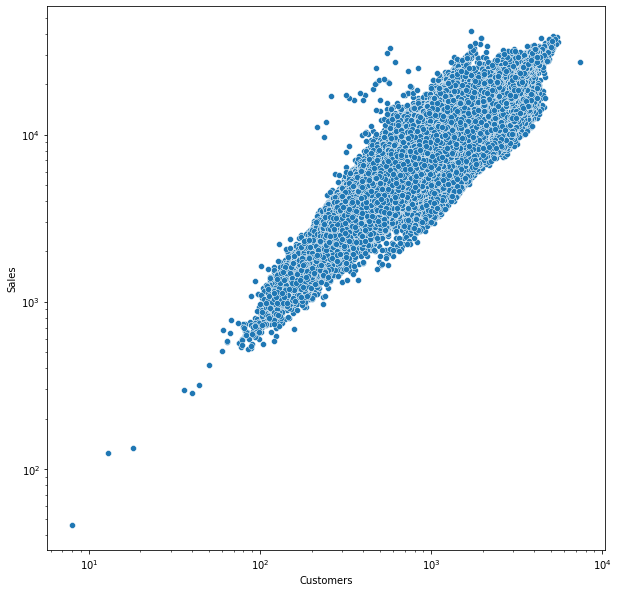

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

sns.scatterplot(x="Customers", y="Sales",ax=ax, data=train[train.Sales != 0 & train.Customers]);

It is normal that Sales will grow with Customers. hence a positive linear correlation exist between these two variables.

#### Promo Days

In [18]:
sales_by_promo = train.groupby('Promo')["Sales"].sum()

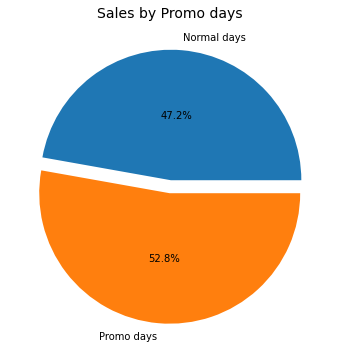

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Normal days', 'Promo days']
plt.pie(x=sales_by_promo, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Sales by Promo days", fontsize=14);

#### School holidays

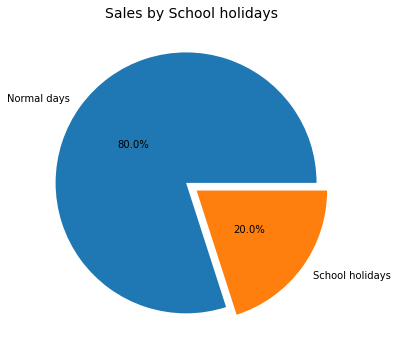

In [20]:
sales_by_schoolh = train.groupby('SchoolHoliday')["Sales"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Normal days', 'School holidays']
plt.pie(x=sales_by_schoolh, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Sales by School holidays", fontsize=14);

#### State Holidays

In [21]:
sales_by_stateh = train.groupby('StateHoliday')["Sales"].sum()
sales_by_stateh[0] += sales_by_stateh['0']
sales_by_stateh.drop(['0'], inplace=True)

In [22]:
labels = ['Normal Days', 'Public holiday', 'Easter holiday', 'Christmas']

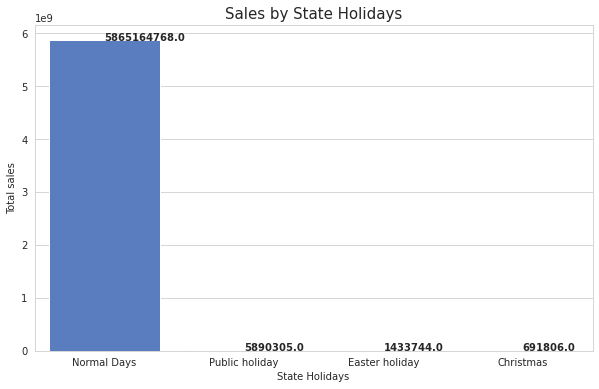

In [23]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=labels, y=sales_by_stateh, data=sales_by_stateh, ci=None, palette="muted",orient='v', )
ax.set_title("Sales by State Holidays", fontsize=15)
ax.set_xlabel ("State Holidays")
ax.set_ylabel ("Total sales")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )

#### Sales growth in function of time

<ipython-input-29-0ec855388fc9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = train[train.Store == 1][train.Sales != 0].iloc[:200]


ValueError: cannot reindex from a duplicate axis

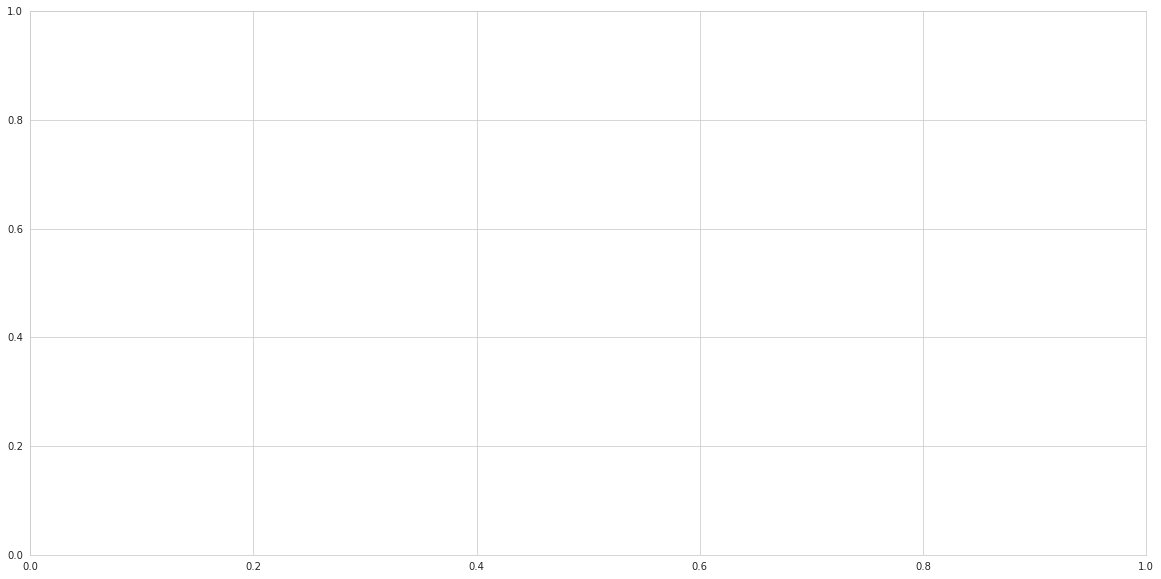

In [29]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
df1 = train[train.Store == 1][train.Sales != 0].iloc[:200]
plt.plot(df1['Date'], df1['Sales'])